In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1f7uslI-ZHidriQFZR966_aILjlkgDN76',
dest_path='content/eye_gender_data.zip',
unzip=True)

In [ ]:
# to prevent unnecessary warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import cv2
from PIL import Image
import json
import requests
from tqdm import tqdm
import random

print(tf.__version__)

2.5.0


In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score

In [ ]:
labels = pd.read_csv("/content/content/eye_gender_data/Training_set.csv") # loading the labels

labels.head()

,filename,label
0,Image_1.jpg,male
1,Image_2.jpg,female
2,Image_3.jpg,female
3,Image_4.jpg,female
4,Image_5.jpg,male


In [ ]:
file_paths = [[fname, '/content/content/eye_gender_data/train/' + fname] for fname in labels['filename']]


In [ ]:
#converting the file_paths of images into a dataframe

images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])

images.head()

,filename,filepaths
0,Image_1.jpg,/content/content/eye_gender_data/train/Image_1...
1,Image_2.jpg,/content/content/eye_gender_data/train/Image_2...
2,Image_3.jpg,/content/content/eye_gender_data/train/Image_3...
3,Image_4.jpg,/content/content/eye_gender_data/train/Image_4...
4,Image_5.jpg,/content/content/eye_gender_data/train/Image_5...


In [ ]:
# connecting labels with corresponding images

train_data = pd.merge(images,labels,how='inner', on='filename')
train_data.head()

,filename,filepaths,label
0,Image_1.jpg,/content/content/eye_gender_data/train/Image_1...,male
1,Image_2.jpg,/content/content/eye_gender_data/train/Image_2...,female
2,Image_3.jpg,/content/content/eye_gender_data/train/Image_3...,female
3,Image_4.jpg,/content/content/eye_gender_data/train/Image_4...,female
4,Image_5.jpg,/content/content/eye_gender_data/train/Image_5...,male


In [ ]:
# label encoding of categorical variables

for i in range(train_data.shape[0]):
  if train_data.label[i] == 'male':
    train_data.label[i]=1
  else:
    train_data.label[i]=0

train_data.tail()

,filename,filepaths,label
9215,Image_9216.jpg,/content/content/eye_gender_data/train/Image_9...,1
9216,Image_9217.jpg,/content/content/eye_gender_data/train/Image_9...,1
9217,Image_9218.jpg,/content/content/eye_gender_data/train/Image_9...,1
9218,Image_9219.jpg,/content/content/eye_gender_data/train/Image_9...,1
9219,Image_9220.jpg,/content/content/eye_gender_data/train/Image_9...,0


In [ ]:
train_data.head()

,filename,filepaths,label
0,Image_1.jpg,/content/content/eye_gender_data/train/Image_1...,1
1,Image_2.jpg,/content/content/eye_gender_data/train/Image_2...,0
2,Image_3.jpg,/content/content/eye_gender_data/train/Image_3...,0
3,Image_4.jpg,/content/content/eye_gender_data/train/Image_4...,0
4,Image_5.jpg,/content/content/eye_gender_data/train/Image_5...,1


In [ ]:
#data preprocessing

data = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too

for i in range(len(train_data)):
  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
  data.append([new_img_array, train_data['label'][i]])



In [ ]:
#  image pixels of an image

data[5]
  

[array([[207, 207, 209, ..., 188, 189, 189],
        [207, 207, 208, ..., 189, 189, 188],
        [206, 207, 208, ..., 192, 189, 187],
        ...,
        [184, 184, 184, ..., 182, 183, 183],
        [184, 184, 185, ..., 181, 180, 179],
        [184, 184, 185, ..., 181, 178, 177]], dtype=uint8), 1]

In [ ]:
# shuffle the data

np.random.shuffle(data)

In [ ]:
data[0]

[array([[125, 123, 122, ..., 123, 127, 131],
        [125, 124, 122, ..., 116, 121, 126],
        [126, 124, 122, ..., 106, 111, 116],
        ...,
        [123, 123, 123, ..., 138, 138, 138],
        [124, 124, 124, ..., 138, 137, 137],
        [125, 125, 125, ..., 137, 137, 137]], dtype=uint8), 0]

In [ ]:
len(data)  #total no. of trainig datasets

9220

In [ ]:
# separate images and labels 

x,y=[],[]

for image in data:
  x.append(image[0])
  y.append(image[1]) #appends gender label to corresponding images in x

In [ ]:
x[:5]

[array([[125, 123, 122, ..., 123, 127, 131],
        [125, 124, 122, ..., 116, 121, 126],
        [126, 124, 122, ..., 106, 111, 116],
        ...,
        [123, 123, 123, ..., 138, 138, 138],
        [124, 124, 124, ..., 138, 137, 137],
        [125, 125, 125, ..., 137, 137, 137]], dtype=uint8),
 array([[122, 119, 113, ..., 187, 184, 182],
        [119, 116, 109, ..., 186, 183, 181],
        [114, 111, 103, ..., 183, 180, 179],
        ...,
        [134, 135, 137, ..., 114, 113, 113],
        [135, 136, 138, ..., 113, 113, 113],
        [135, 136, 138, ..., 113, 113, 113]], dtype=uint8),
 array([[211, 211, 211, ..., 150, 157, 161],
        [211, 211, 210, ..., 147, 154, 158],
        [212, 211, 209, ..., 142, 149, 153],
        ...,
        [198, 198, 197, ..., 200, 199, 199],
        [195, 195, 195, ..., 200, 199, 199],
        [193, 193, 194, ..., 200, 199, 199]], dtype=uint8),
 array([[143, 138, 132, ..., 132, 131, 131],
        [135, 133, 131, ..., 131, 131, 130],
        [124, 12

In [ ]:
y[:5]

[0, 1, 1, 1, 1]

In [ ]:
# transforming x, y lists to numpy array

x = np.array(x)
y = np.array(y)

In [ ]:
#normalizing the pixel value of train set
x = x/255

In [ ]:
np.unique(y, return_counts=True)
# displaying unique males and females


(array([0., 1.]), array([4162, 5058]))

In [ ]:
# reshape x s.t. it has (100,100,1 -> {as: ht,width,greyscale}) as dimensions and rest dimension is corrected automatically

x = x.reshape(-1,100,100,1)

In [ ]:
#splitting data

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15, random_state=1)

In [ ]:
#model architecture CNN

cnn = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
tf.keras.layers.MaxPooling2D((2, 2)),

tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),

# tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(131, activation='sigmoid')
])

In [ ]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2166848   
_________________________________________________________________
dense_7 (Dense)              (None, 131)              

In [ ]:
cnn.fit(x_train,y_train,epochs=8,batch_size=1)

Epoch 1/8
7837/7837 [==============================] - 193s 25ms/step - loss: 0.5097 - accuracy: 0.7588
Epoch 2/8
7837/7837 [==============================] - 193s 25ms/step - loss: 0.3585 - accuracy: 0.8432
Epoch 3/8
7837/7837 [==============================] - 193s 25ms/step - loss: 0.2882 - accuracy: 0.8799
Epoch 4/8
7837/7837 [==============================] - 193s 25ms/step - loss: 0.2464 - accuracy: 0.8975
Epoch 5/8
7837/7837 [==============================] - 193s 25ms/step - loss: 0.2099 - accuracy: 0.9146
Epoch 6/8
7837/7837 [==============================] - 194s 25ms/step - loss: 0.1749 - accuracy: 0.9315
Epoch 7/8
7837/7837 [==============================] - 193s 25ms/step - loss: 0.1472 - accuracy: 0.9408
Epoch 8/8
7837/7837 [==============================] - 194s 25ms/step - loss: 0.1202 - accuracy: 0.9537


In [ ]:
#validate the output

cnn.evaluate(x_val,y_val)

44/44 [==============================] - 4s 92ms/step - loss: 0.3829 - accuracy: 0.8944


[0.38288795948028564, 0.8944323658943176]

In [ ]:
# predicting output on TEST dataset

# loading test dataset

test_image_order = pd.read_csv("/content/content/eye_gender_data/Testing_set.csv")
test_image_order.tail()

,filename
2300,Image_2301.jpg
2301,Image_2302.jpg
2302,Image_2303.jpg
2303,Image_2304.jpg
2304,Image_2305.jpg


In [ ]:
# obtaining test_images file path

file_paths = [[fname, '/content/content/eye_gender_data/test/' + fname] for fname in test_image_order['filename']]


In [ ]:
# converting the file_path into dataframe
test_images = pd.DataFrame(file_paths, columns = ['filename','filepaths'])
test_images.head()

,filename,filepaths
0,Image_1.jpg,/content/content/eye_gender_data/test/Image_1.jpg
1,Image_2.jpg,/content/content/eye_gender_data/test/Image_2.jpg
2,Image_3.jpg,/content/content/eye_gender_data/test/Image_3.jpg
3,Image_4.jpg,/content/content/eye_gender_data/test/Image_4.jpg
4,Image_5.jpg,/content/content/eye_gender_data/test/Image_5.jpg


In [ ]:
# data-preprocessing on test dataset

test_data = [] #initializing an empty array
image_size = 100 #setting img_size=100, although it is user-dependent

for i in range(len(test_images)):
  img_arr = cv2.imread(test_images['filepaths'][i], cv2.IMREAD_GRAYSCALE) #---> tranforming from rgb-> greyscale
  new_img_arr = cv2.resize(img_arr, (image_size,image_size)) # resizing the images
  test_data.append(new_img_arr)

In [ ]:
# converting test_data list of images into a numpy array

test_data = np.array(test_data)


In [ ]:
#reshaping test_data

test_data = test_data.reshape(-1,100,100,1)


In [ ]:
# making final predictions on test dataset

prediction = cnn.predict(test_data)
prediction

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9959469e-01, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2732488e-33, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
# displying the predicted values with PROBABILITY values

prediction[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#converting above prob. values into respective gender_classes using np.argmax

pred = []

for val in prediction:
  pred.append(np.argmax(val))

In [ ]:
len(pred)

2305

In [ ]:
# inverse tranforming the values into categorical variable

for i in range(len(pred)):
  if pred[i] == 1:
    pred[i]='male'
  else:
    pred[i]='female'



In [ ]:
# downloading submission file

res = pd.DataFrame({'filename': test_images['filename'], 'label': pred}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
img_array.shape

(63, 63)

In [ ]:
images.head()

,filename,filepaths
0,Image_1.jpg,/content/content/eye_gender_data/train/Image_1...
1,Image_2.jpg,/content/content/eye_gender_data/train/Image_2...
2,Image_3.jpg,/content/content/eye_gender_data/train/Image_3...
3,Image_4.jpg,/content/content/eye_gender_data/train/Image_4...
4,Image_5.jpg,/content/content/eye_gender_data/train/Image_5...


In [ ]:
for i in range(9220):
  if labels.label[i] == 'male':
    labels.label[i]=1
  else:
    labels.label[i] = 0

In [ ]:
df = labels
df.head()

,filename,label
0,Image_1.jpg,1
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,1


In [ ]:
df = df.rename(columns={'filename':'file_n', 'label':'gender'})
df.head()

,file_n,gender
0,Image_1.jpg,1
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,1


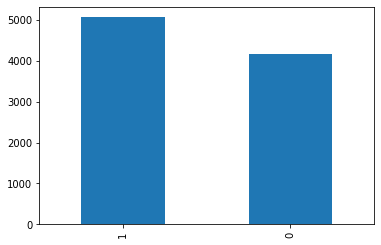

In [ ]:
df['gender'].value_counts().plot.bar()

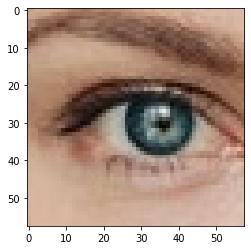

(58, 58)


In [ ]:
path1 = images.filepaths[1]
img1 = Image.open(path1)
plt.imshow(img1)
plt.show()
print(img1.size)

In [ ]:
x = np.array(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
y = df.gender